<a href="https://colab.research.google.com/github/Vukhmt02/naive-bayes-project/blob/main/latestvietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 29.7 MB/s eta 0:00:00


# Inference

In [1]:
# The explicit Pillow downgrade is removed to allow vietocr to use its required version (10.2.0).
# It is CRITICAL to restart the Colab runtime (Runtime -> Restart runtime) after executing this cell
# for the changes to take full effect and resolve any persistent module loading issues.
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
config = Cfg.load_config_from_name('vgg_transformer')
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [5]:
detector = Predictor(config)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


In [6]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2026-01-19 07:07:57--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K   600KB/s    in 0.5s    

2026-01-19 07:07:58 (600 KB/s) - ‘sample.zip’ saved [305969/305969]



In [7]:
! ls sample | shuf |head -n 5

036301002139.jpeg
465_Ecclesiastics_24500.jpg
036200006617.jpeg
00019816.jpg
2019_10_05_phung_vu_minh_phong_201910051031556_8.jpg


'VŨ THUỲ NINH'

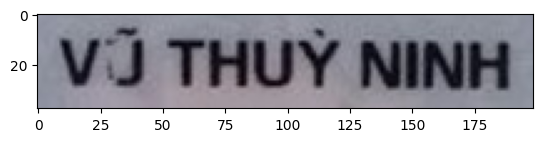

In [8]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [9]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2026-01-19 07:08:12--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  17.3MB/s    in 4.3s    

2026-01-19 07:08:17 (13.6 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [10]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [1]:
!pip install numpy==1.26.4
# It is CRITICAL to restart the Colab runtime (Runtime -> Restart runtime) after executing this cell
# for the NumPy downgrade to take full effect and resolve the AttributeError.
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

In [3]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [4]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained

In [5]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


100%|██████████| 548M/548M [00:02<00:00, 192MB/s]
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:04<00:00, 1277.57it/s]


Created dataset with 5482 samples


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 147123.36it/s]
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1696.15it/s]

Created dataset with 1812 samples



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 108081.56it/s]


Save model configuration for inference, load_config_from_file

In [6]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

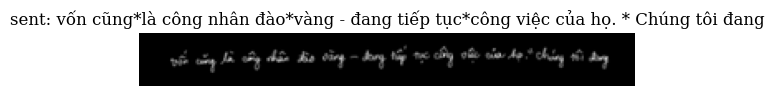

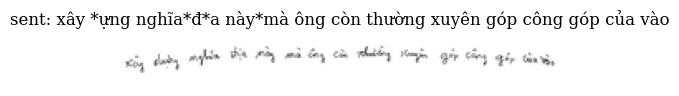

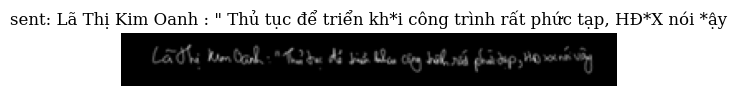

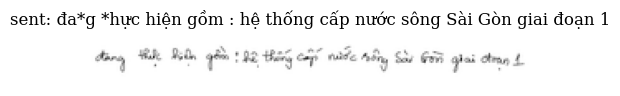

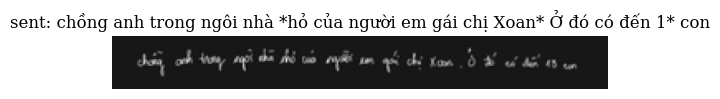

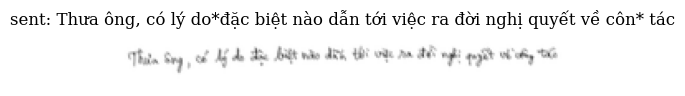

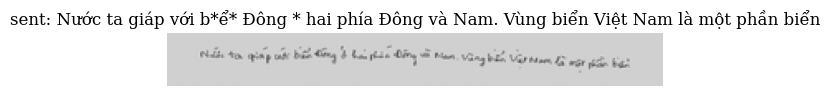

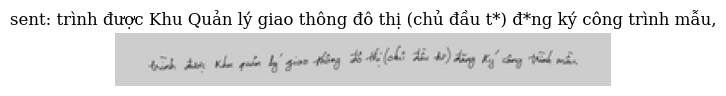

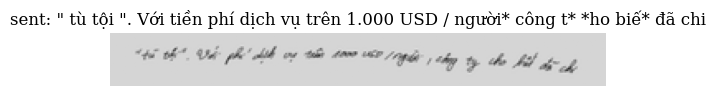

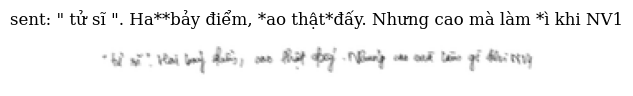

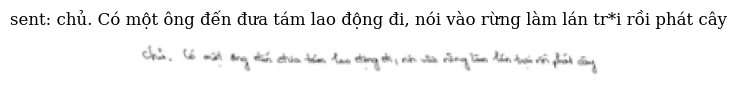

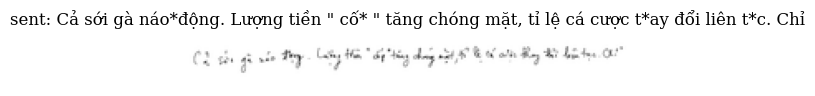

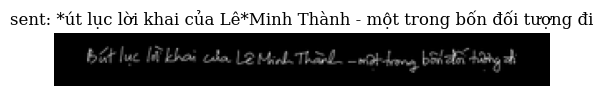

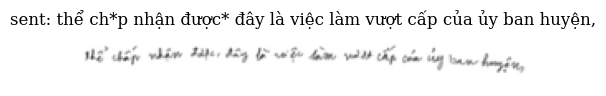

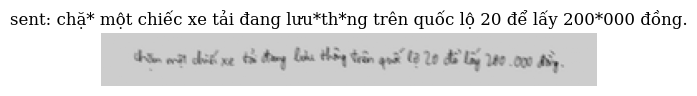

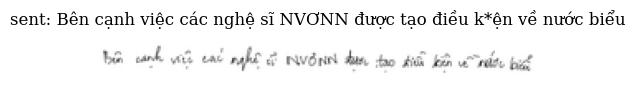

In [7]:
trainer.visualize_dataset()

Train now

In [8]:
trainer.config['trainer']['iters'] = trainer.config['trainer']['iters']
trainer.train()

iter: 000200 - train loss: 1.573 - lr: 1.91e-05 - load time: 0.92 - gpu time: 73.75
iter: 000400 - train loss: 1.299 - lr: 3.95e-05 - load time: 0.38 - gpu time: 75.22
iter: 000600 - train loss: 1.173 - lr: 7.14e-05 - load time: 0.41 - gpu time: 74.88
iter: 000800 - train loss: 1.112 - lr: 1.12e-04 - load time: 0.84 - gpu time: 75.20
iter: 001000 - train loss: 1.059 - lr: 1.56e-04 - load time: 0.42 - gpu time: 74.80
iter: 001200 - train loss: 1.020 - lr: 2.01e-04 - load time: 0.40 - gpu time: 74.56


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


iter: 001400 - train loss: 0.994 - lr: 2.41e-04 - load time: 0.82 - gpu time: 75.00
iter: 001600 - train loss: 0.958 - lr: 2.73e-04 - load time: 0.39 - gpu time: 74.70
iter: 001800 - train loss: 0.940 - lr: 2.93e-04 - load time: 0.65 - gpu time: 75.41


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


KeyboardInterrupt: 

```markdown
## Thêm chức năng đọc văn bản thành âm thanh

Để chuyển đổi văn bản thành giọng nói, chúng ta sẽ sử dụng thư viện `gTTS` và `IPython.display.Audio` để phát âm thanh trực tiếp trong Colab.
```

Visualize prediction from our trained model


In [ ]:
!pip install --quiet vietocr
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Re-load and configure the config object
config = Cfg.load_config_from_name('vgg_transformer')

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

# Re-initialize the trainer object
trainer = Trainer(config, pretrained=True)

trainer.visualize_prediction()

### Hướng dẫn lưu hình ảnh/biểu đồ từ Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Đây là một ví dụ về cách tạo và lưu một biểu đồ đơn giản.
# Nếu trainer.visualize_prediction() hiển thị một figure, bạn có thể sử dụng plt.gcf() để lấy figure hiện tại.

# Tạo một figure và axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.random.rand(10), label='Dữ liệu ngẫu nhiên')
ax.set_title('Biểu đồ mẫu')
ax.set_xlabel('Chỉ số')
ax.set_ylabel('Giá trị')
ax.legend()

# Lưu figure vào một file
# Bạn có thể thay đổi định dạng (ví dụ: .jpg, .svg, .pdf) và đường dẫn lưu
output_image_path = 'my_plot_output.png'
fig.savefig(output_image_path)

print(f"Biểu đồ đã được lưu vào {output_image_path}")

# Nếu bạn muốn lưu vào Google Drive:
# Đảm bảo Drive đã được mount (như trong cell W-J9EbY2UXKt)
# drive_output_image_path = '/content/drive/MyDrive/my_plot_output_in_drive.png'
# fig.savefig(drive_output_image_path)
# print(f"Biểu đồ cũng đã được lưu vào Google Drive tại {drive_output_image_path}")

# Hiển thị biểu đồ (tùy chọn)
plt.show()

Compute full seq accuracy for full valid dataset

In [ ]:
from PIL import Image

# 1. Đường dẫn tới file ảnh bạn vừa tải lên
img_path = '20140603_0003_BCCTC_tg_0_1.png'

# 2. Mở ảnh
img = Image.open(img_path)

# 3. Sử dụng mô hình đã train để dự đoán
# Lưu ý: 'trainer.detector' là bộ dự đoán đã được nạp trọng số từ quá trình train của bạn
prediction = trainer.detector.predict(img)

# 4. Hiển thị kết quả
print("Nội dung AI đọc được là:", prediction)
img.show()

AttributeError: 'Trainer' object has no attribute 'detector'

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Model weight /tmp/vgg_transformer.pth exsits. Ignore download!
Nội dung AI đọc được: Các Đại hội Thể thao Đông Nam Á
🎧 Đang phát âm thanh...


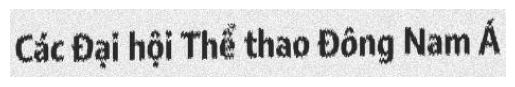

In [15]:
!pip install --quiet gtts

from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
import matplotlib.pyplot as plt
from gtts import gTTS
from IPython.display import Audio # Import Audio from IPython.display

# 1. Load config
config = Cfg.load_config_from_file('config.yml')

# 2. Dùng pretrained model
config['weights'] = config['pretrain']

# 3. Thiết bị
config['device'] = 'cuda:0'

# 4. Predictor
detector = Predictor(config)

# 5. Ảnh OCR
img_path = '10021.jpg'

# 6. Open
img = Image.open(img_path)

# 7. Predict
prediction = detector.predict(img)
print("Nội dung AI đọc được:", prediction)

# 🔊 8. Text-to-Speech (TTS)
tts = gTTS(text=prediction, lang='vi')
audio_path = "result.mp3"
tts.save(audio_path)

print("🎧 Đang phát âm thanh...")
# Sử dụng IPython.display.Audio để phát âm thanh
display(Audio(audio_path, autoplay=True))

# 9. Hiển thị ảnh
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
trainer.precision()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


KeyboardInterrupt: 